In [3]:
import networkx as nx
import numpy as np
import itertools 

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [4]:
def kplaplacian_mtf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

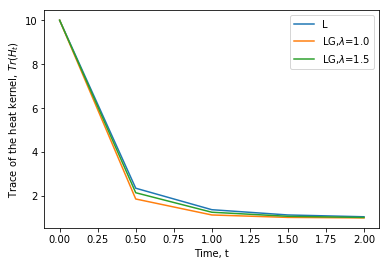

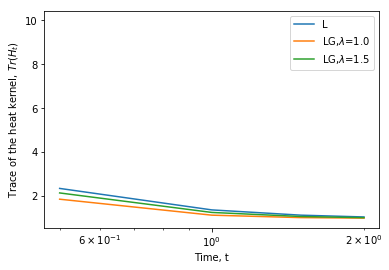

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh

n=10
m=3
G = nx.barabasi_albert_graph(n, m, seed=None)


l1 = eigvalsh(nx.laplacian_matrix(G).todense())
l2 = eigvalsh(kplaplacian_ltf(G,1))
l3 = eigvalsh(kplaplacian_ltf(G,1.5))
time = np.arange(0,2.5,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='L')
plt.plot(time,T2, label='LG,$\lambda$=1.0')
plt.plot(time,T3, label='LG,$\lambda$=1.5')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

plt.semilogx(time,T1, label='L')
plt.semilogx(time,T2, label='LG,$\lambda$=1.0')
plt.semilogx(time,T3, label='LG,$\lambda$=1.5')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

1


/usr/lib/python3/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


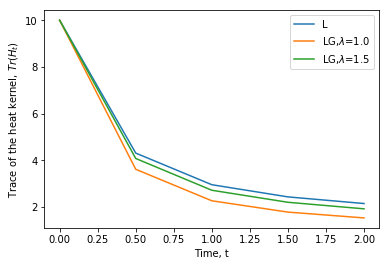

In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

n=10
p=0.25

G = nx.gnp_random_graph(n, p, seed=None, directed=False)
while (nx.is_connected(G)==False):
    print("1")
    G = nx.gnp_random_graph(n, p, seed=None, directed=False)

l1 = eigvals(nx.laplacian_matrix(G).todense())
l2 = eigvals(kplaplacian_ltf(G,1))
l3 = eigvals(kplaplacian_ltf(G,1.5))
time = np.arange(0,2.5,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))
    T3.append(np.sum(np.exp(-t*(l3))))

plt.plot(time,T1, label='L')
plt.plot(time,T2, label='LG,$\lambda$=1.0')
plt.plot(time,T3, label='LG,$\lambda$=1.5')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

1.488888888888889
1.6


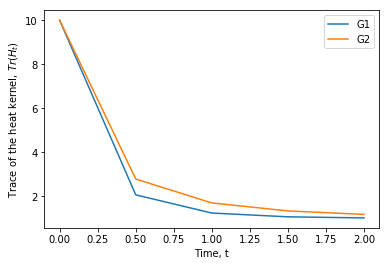

In [55]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh

n=10
m=4
G1 = nx.barabasi_albert_graph(n, m, seed=None)
print(nx.average_shortest_path_length(G1))

n=10
p=0.46

G2 = nx.gnp_random_graph(n, p, seed=None, directed=False)
while (nx.is_connected(G2)==False):
    print("1")
    G2 = nx.gnp_random_graph(n, p, seed=None, directed=False)
print(nx.average_shortest_path_length(G2))

l1 = eigvalsh(nx.laplacian_matrix(G1).todense())
l2 = eigvalsh(nx.laplacian_matrix(G2).todense())

time = np.arange(0,2.5,0.5)

T1=[]
T2=[]
T3 = []
TT=[]
for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))

plt.plot(time,T1, label='G1')
plt.plot(time,T2, label='G2')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()

2.3533333333333335
2.3278787878787877


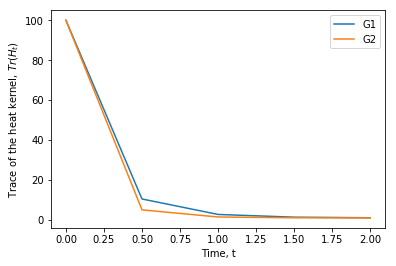

In [56]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh

n=100
m=4
G1 = nx.barabasi_albert_graph(n, m, seed=None)
print(nx.average_shortest_path_length(G1))

n=100
p=0.09

G2 = nx.gnp_random_graph(n, p, seed=None, directed=False)
while (nx.is_connected(G2)==False):
    print("1")
    G2 = nx.gnp_random_graph(n, p, seed=None, directed=False)
print(nx.average_shortest_path_length(G2))

l1 = eigvalsh(nx.laplacian_matrix(G1).todense())
l2 = eigvalsh(nx.laplacian_matrix(G2).todense())

time = np.arange(0,2.5,0.5)

T1=[]
T2=[]

for t in time:
    T1.append(np.sum(np.exp(-t*(l1))))
    T2.append(np.sum(np.exp(-t*(l2))))

plt.plot(time,T1, label='G1')
plt.plot(time,T2, label='G2')
plt.xlabel('Time, t')
plt.ylabel('Trace of the heat kernel, $Tr(H_t)$')
plt.legend()
plt.show()